**Importing Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset**

In [3]:
file_path = "Netflix Dataset.csv"
df = pd.read_csv(file_path)

**Data Preprocessing**

In [5]:
# Display initial info
print("Initial Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())

Initial Dataset Shape: (7689, 11)
Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']


In [6]:
# Step 1: Remove Duplicates
df.drop_duplicates(inplace=True)
print("After Removing Duplicates:", df.shape)

After Removing Duplicates: (7689, 11)


In [8]:
# Step 2: Handle Null Values
# Check missing values
print("\nMissing Values Before Handling:\n", df.isnull().sum())

# Fill null values with 'Unknown' for categorical/text columns
fill_cols = ['Director', 'Cast', 'Country', 'Rating', 'Duration', 'Type', 'Description']
for col in fill_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

# Drop rows where essential fields are missing (like Title or Category)
df.dropna(subset=['Title', 'Category', 'Release_Date'], inplace=True)

print("\nMissing Values After Handling:\n", df.isnull().sum())



Missing Values Before Handling:
 Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

Missing Values After Handling:
 Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64


In [9]:
# Step 3: Convert Release_Date to datetime format
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

In [10]:
# Step 4: Remove rows with invalid or missing Release_Date after conversion
df = df.dropna(subset=['Release_Date'])

In [11]:
# Final shape and preview
print("\nFinal Dataset Shape:", df.shape)
print("\nSample Data:\n", df.head())


Final Dataset Shape: (7689, 11)

Sample Data:
   Show_Id Category  Title           Director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  Release_Date Rating   Duration  \
0   2020-08-14  TV-MA  4 Seasons   
1   2016-12-23  TV-MA     93 min   
2   2018-12-20      R     78 min   
3   2017-11-16  PG-13     80 min   
4   2020-01-01  PG-13    123 min   

                   

**1. Content Distribution: Movies vs TVs**

In [12]:
# Extract Year from release date
df['Year'] = df['Release_Date'].dt.year

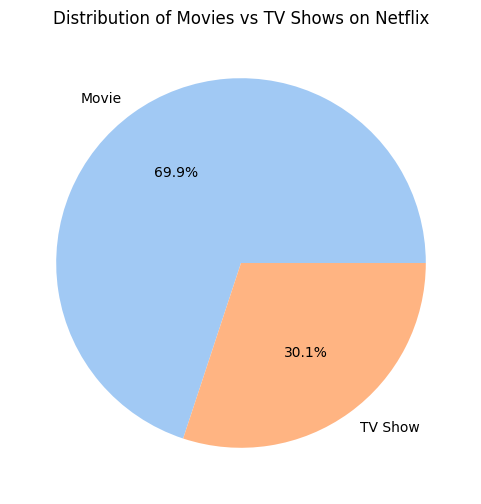

In [13]:
content_type_count = df['Category'].value_counts()

plt.figure(figsize=(6,6))
colors = sns.color_palette("pastel")
plt.pie(content_type_count, labels=content_type_count.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Movies vs TV Shows on Netflix')
plt.show()

**2. Content growth over the years**

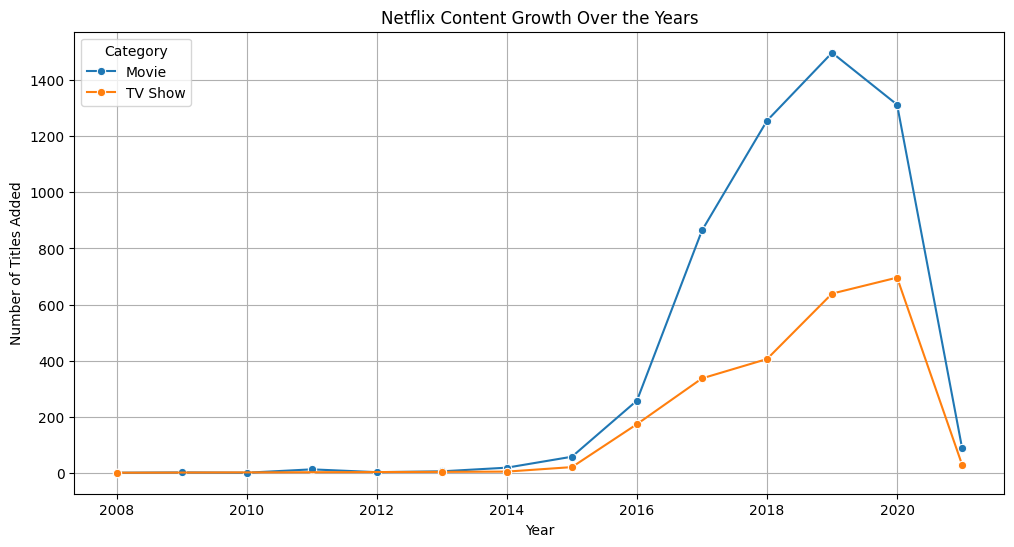

In [14]:
yearly_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')

plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_trend, x='Year', y='Count', hue='Category', marker='o')
plt.title('Netflix Content Growth Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()

**3. Genre/Type Analysis**

/tmp/ipython-input-1312711617.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette='mako')


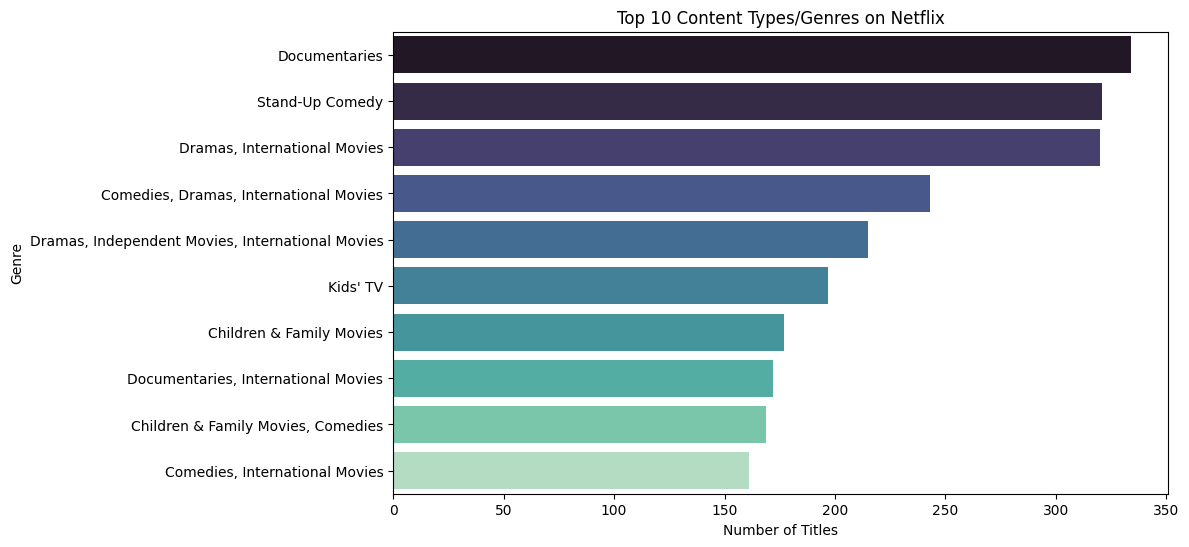

In [15]:
# Visualize top 10 genres/types
top_genres = df['Type'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette='mako')
plt.title('Top 10 Content Types/Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

**4. Country Contribution Analysis**

/tmp/ipython-input-1088127884.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_counts.index, x=country_counts.values, palette='coolwarm')


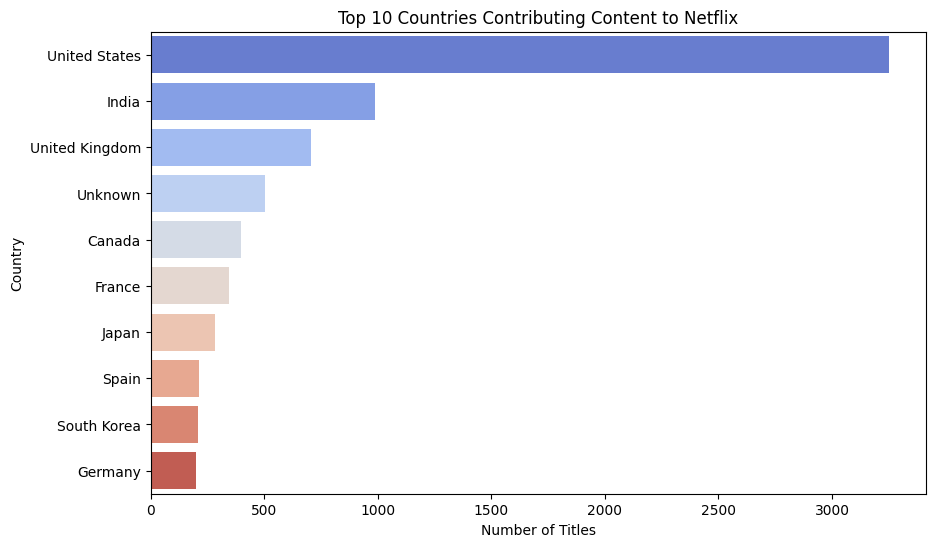

In [16]:
# Split multiple countries and count individually
df['Country_List'] = df['Country'].apply(lambda x: [c.strip() for c in str(x).split(',')])
country_exploded = df.explode('Country_List')
country_counts = country_exploded['Country_List'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=country_counts.index, x=country_counts.values, palette='coolwarm')
plt.title('Top 10 Countries Contributing Content to Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

**5. Rating Distribution Analysis**

/tmp/ipython-input-1340286655.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index, palette='Set2')


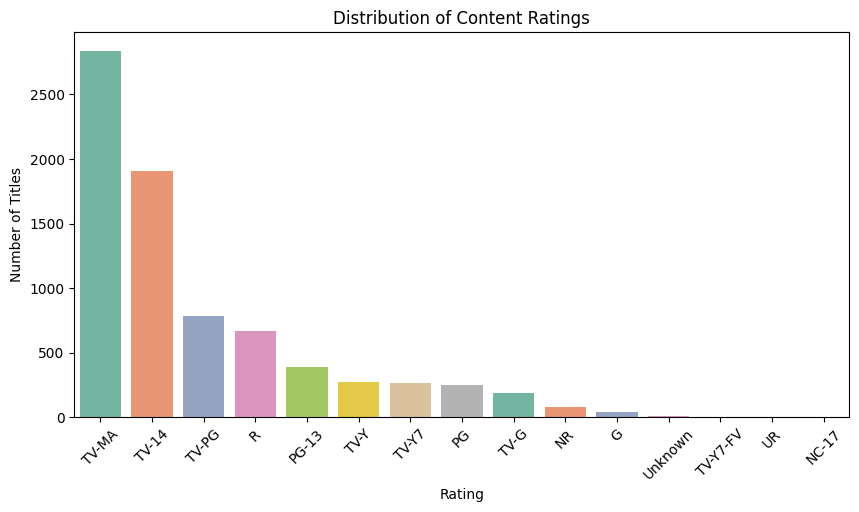

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index, palette='Set2')
plt.title('Distribution of Content Ratings')
plt.xticks(rotation=45)
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.show()

**6. Duration Analysis (Movies vs TV Shows)**

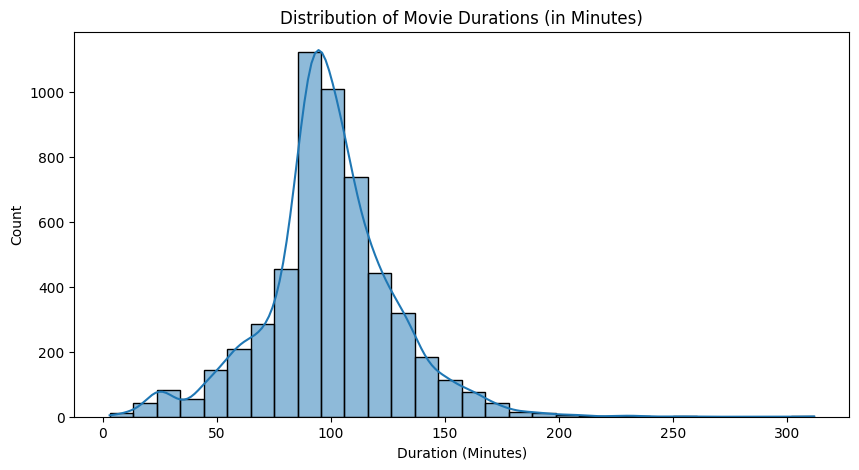

/tmp/ipython-input-2117032414.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=tv_shows['Duration'], order=tv_shows['Duration'].value_counts().index, palette='viridis')


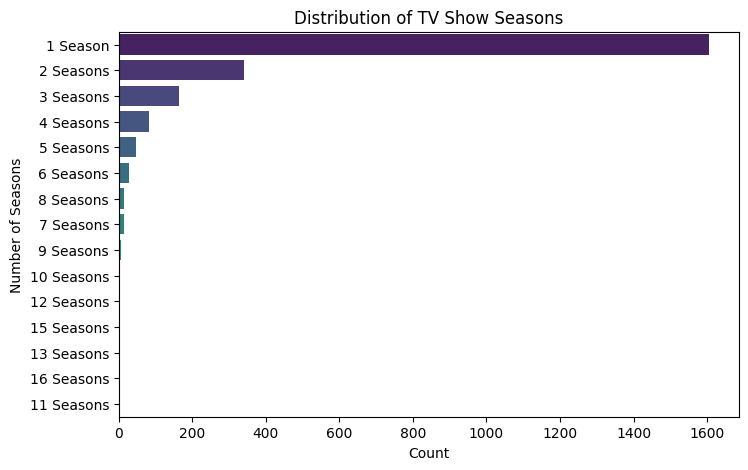

In [18]:
movies = df[df['Category'] == 'Movie']
tv_shows = df[df['Category'] == 'TV Show']

plt.figure(figsize=(10,5))
sns.histplot(movies['Duration'].apply(lambda x: int(str(x).split()[0]) if str(x).split()[0].isdigit() else 0), bins=30, kde=True)
plt.title('Distribution of Movie Durations (in Minutes)')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(y=tv_shows['Duration'], order=tv_shows['Duration'].value_counts().index, palette='viridis')
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Count')
plt.ylabel('Number of Seasons')
plt.show()

**7. Summary**

**Key Insights:**
1. Netflix’s catalog is dominated by Movies, but TV Shows have increased steadily over time.
2. Content additions surged after 2015, reflecting Netflix’s global expansion strategy.
3. The USA and India contribute the most content, followed by the UK and other countries.
4. The most frequent content ratings are TV-MA and TV-14, showing a focus on mature audiences.
5. Most movies are between 90–120 minutes, and TV shows commonly have 1–3 seasons.
6. Genre trends highlight high representation of Dramas, Comedies, and Documentaries.